# Audiobook Dataset – Exploratory Data Analysis (EDA)

This notebook explores a cleaned dataset of 87,000+ audiobooks to uncover insights into pricing, ratings, narrators, and language trends.  
The goal is to identify patterns that influence audiobook popularity and provide actionable findings for publishers, platforms, and consumers.

---

## Objectives
- Examine distributions of key variables (`price`, `ratings`, `time`).
- Analyze relationships between price, ratings, and audiobook length.
- Compare trends across languages and narrators.
- Visualize findings to support storytelling and decision-making.

---

## Executive Summary

This project analyzes a large audiobook dataset to uncover patterns in pricing, ratings, and user engagement.  
Key findings show that most audiobooks remain *Unrated*, while those reviewed cluster at 4–5 stars, indicating strong satisfaction.  
Price and length do not significantly influence ratings; instead, narrator quality and language drive engagement.  
English dominates the market, but Hindi, Tamil, and Urdu show emerging growth potential.  
Overall, the analysis highlights that **quality narration and regional expansion matter more than pricing or length in driving audiobook success**.

## Introduction

We begin by loading the cleaned audiobook dataset and reviewing its structure.  
This step ensures the data is correctly imported and ready for analysis.

In [36]:
import pandas as pd 
import numpy as np

In [44]:
df = pd.read_csv('clean_audio_dataset.csv')
df['releasedate'] = pd.to_datetime(df['releasedate'])
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         87489 non-null  object        
 1   author       87489 non-null  object        
 2   narrator     87489 non-null  object        
 3   time         87489 non-null  int64         
 4   releasedate  87489 non-null  datetime64[ns]
 5   language     87489 non-null  object        
 6   price        87489 non-null  float64       
 7   ratings      87489 non-null  object        
 8   num_ratings  87489 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 6.0+ MB


,time,releasedate,price,num_ratings
count,87489.000000,87489,87489.000000,87489.000000
mean,410.549818,2018-06-23 22:53:20.411480064,561.269301,2.605265
min,0.000000,1998-12-27 00:00:00,11.000000,0.000000
25%,128.000000,2016-09-06 00:00:00,279.000000,0.000000
50%,380.000000,2020-02-06 00:00:00,585.000000,0.000000
75%,580.000000,2021-08-17 00:00:00,755.000000,0.000000
max,8595.000000,2025-11-14 00:00:00,7198.000000,985.000000
std,365.232669,NaN,334.292057,26.386287


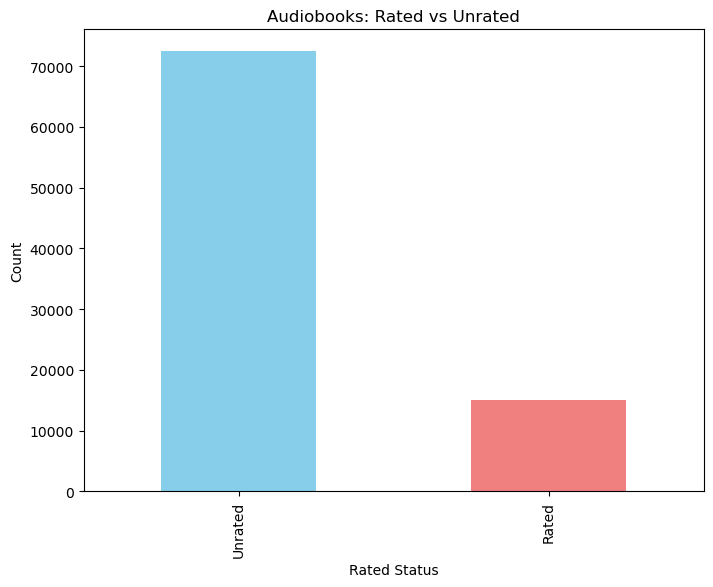

In [51]:
import matplotlib.pyplot as plt

# Create Rated Status column
df['rated_status'] = df['ratings'].apply(lambda x: 'Rated' if x != 'Unrated' else 'Unrated')

# Count values
rated_counts = df['rated_status'].value_counts()

# Plot bar chart
rated_counts.plot(kind='bar', color=['skyblue','lightcoral'], figsize=(8,6))
plt.title("Audiobooks: Rated vs Unrated")
plt.xlabel("Rated Status")
plt.ylabel("Count")
plt.show()

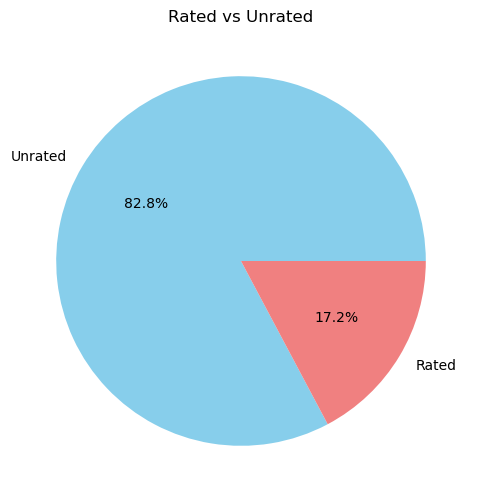

In [52]:
rated_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','lightcoral'],
                  figsize=(6,6), title="Rated vs Unrated")
plt.ylabel("")  # hides y-label
plt.show()

## Univariate Analysis

We first examine individual variables to understand their distributions.  
This helps identify skewness, outliers, and general patterns in the data.

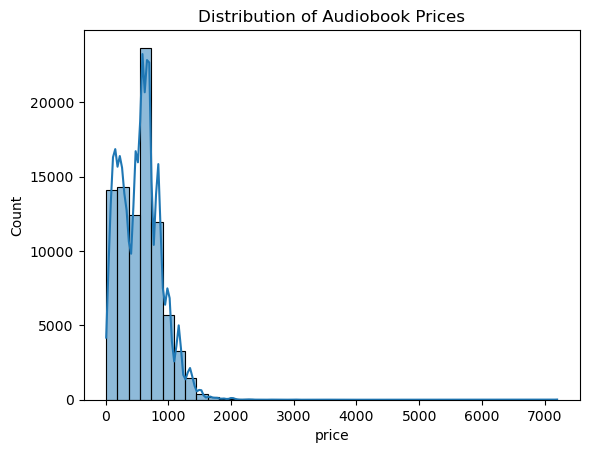

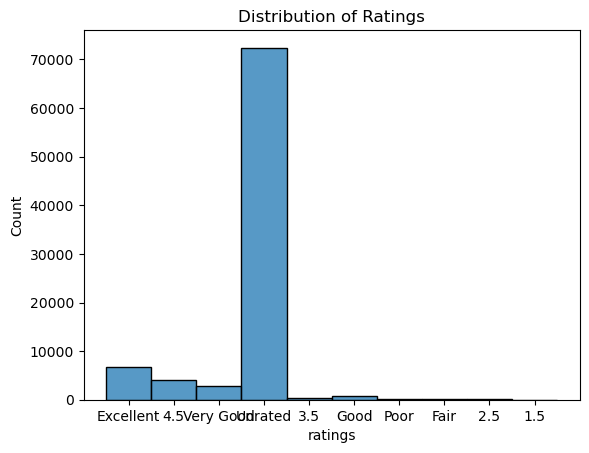

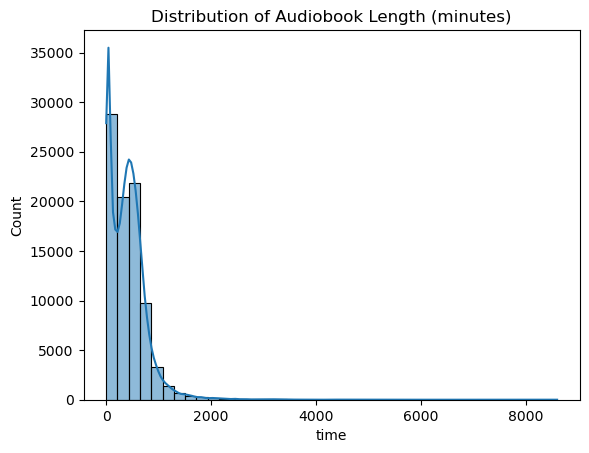

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(df['price'], bins=40, kde=True)
plt.title("Distribution of Audiobook Prices")
plt.show()

# Ratings distribution
sns.histplot(df['ratings'], bins=10, kde=False)
plt.title("Distribution of Ratings")
plt.show()

# Time distribution
sns.histplot(df['time'], bins=40, kde=True)
plt.title("Distribution of Audiobook Length (minutes)")
plt.show()


## Bivariate Analysis

We now explore relationships between key variables to identify correlations and patterns.  
This includes price vs ratings, audiobook length vs ratings, and price vs number of ratings.

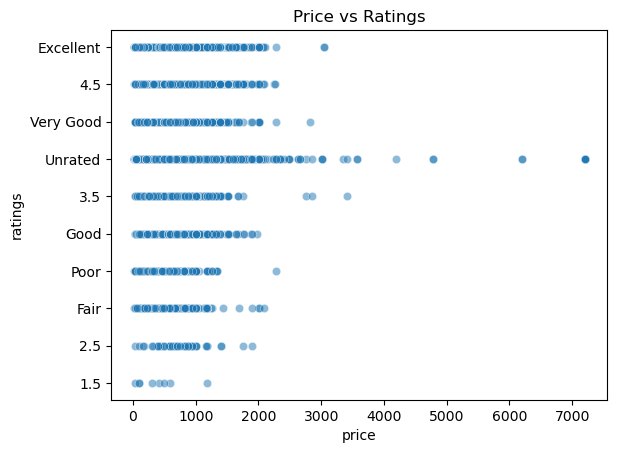

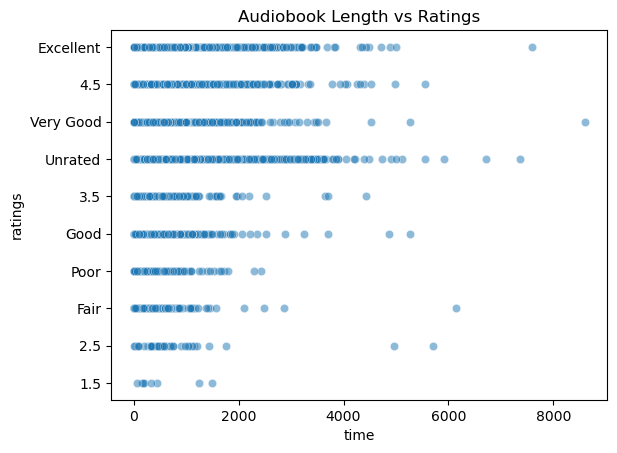

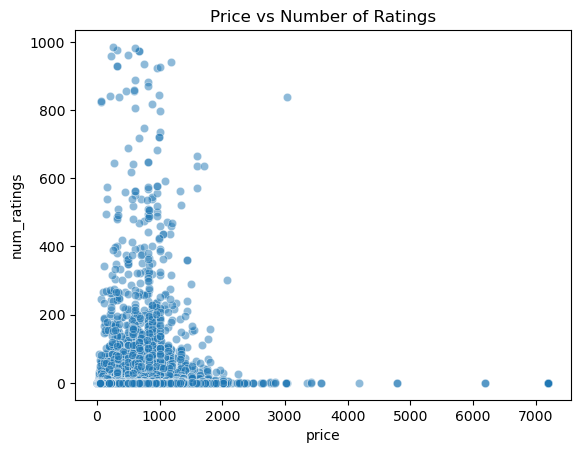

In [39]:
# Price vs Ratings
sns.scatterplot(x='price', y='ratings', data=df, alpha=0.5)
plt.title("Price vs Ratings")
plt.show()

# Time vs Ratings
sns.scatterplot(x='time', y='ratings', data=df, alpha=0.5)
plt.title("Audiobook Length vs Ratings")
plt.show()

# Price vs Number of Ratings
sns.scatterplot(x='price', y='num_ratings', data=df, alpha=0.5)
plt.title("Price vs Number of Ratings")
plt.show()

## Grouped Analysis

We now analyze aggregated statistics across categories to uncover broader trends.  
This includes average price and ratings by language, narrator, and release year.

Average Price by Language:
 language
icelandic            75.230769
telugu              104.000000
basque              115.000000
ukrainian           117.000000
tamil               144.801242
lithuanian          149.000000
bulgarian           157.666667
russian             181.148559
finnish             184.746193
swedish             197.850485
romanian            203.780000
arabic              206.625000
czech               232.304348
polish              240.767857
norwegian           256.875000
greek               259.777778
galician            295.300000
turkish             300.900000
danish              307.069519
italian             308.214180
catalan             309.810458
hungarian           331.833333
portuguese          333.830798
german              370.074864
Hindi               389.768349
dutch               400.026316
japanese            420.271235
spanish             427.320366
afrikaans           477.750000
korean              480.750000
urdu                498.264706
he

<Axes: title={'center': 'Average Price by Release Year'}, xlabel='year'>

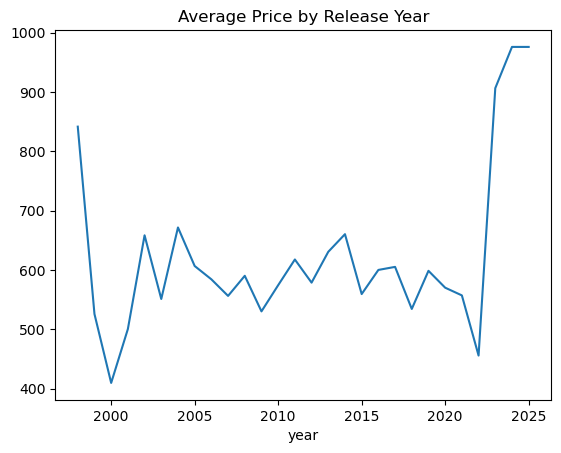

In [43]:
# Average price by language (still numeric)
avg_price_lang = df.groupby('language')['price'].mean().sort_values()
print("Average Price by Language:\n", avg_price_lang)

# Ratings distribution by language (categorical)
ratings_by_lang = df.groupby('language')['ratings'].value_counts(normalize=True).unstack().fillna(0)
print("\nRatings Distribution by Language:\n", ratings_by_lang)

# Top 10 narrators by proportion of 'Excellent'
top_narrators = (
    df[df['ratings'] == 'Excellent']
    .groupby('narrator')
    .size()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Narrators by Excellent Ratings:\n", top_narrators)

# Average price by release year
df['year'] = pd.to_datetime(df['releasedate']).dt.year
avg_price_year = df.groupby('year')['price'].mean()
avg_price_year.plot(kind='line', title="Average Price by Release Year")

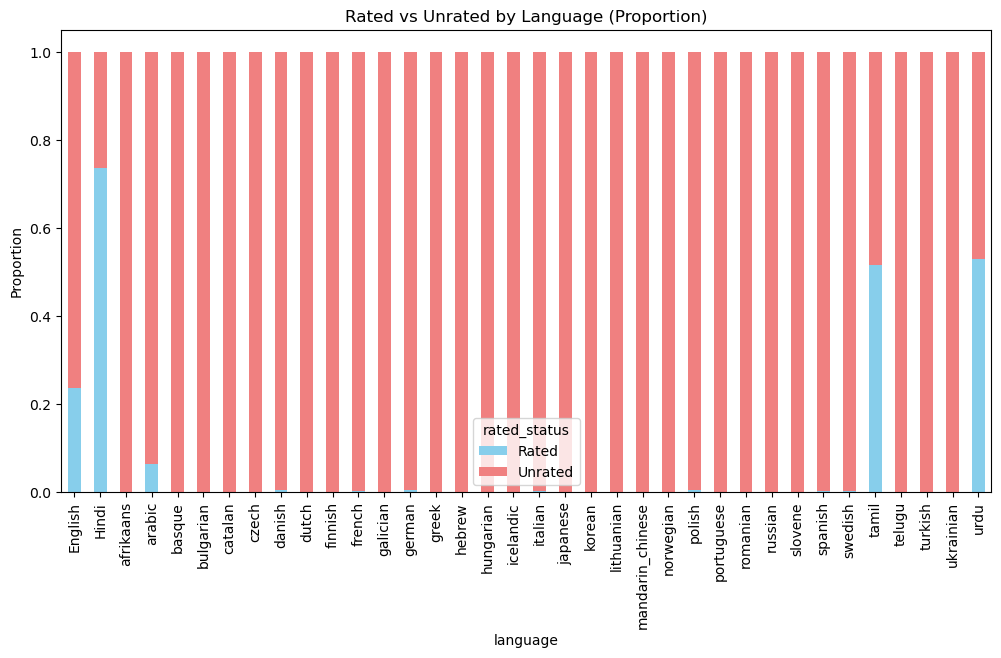

In [53]:
# Create Rated Status column
df['rated_status'] = df['ratings'].apply(lambda x: 'Rated' if x != 'Unrated' else 'Unrated')

# Count by language and rated status
rated_by_lang = df.groupby(['language','rated_status']).size().unstack().fillna(0)

# Convert to proportions
rated_by_lang_pct = rated_by_lang.div(rated_by_lang.sum(axis=1), axis=0)

# Plot stacked bar chart (proportion)
rated_by_lang_pct.plot(kind='bar', stacked=True, figsize=(12,6),
                       color=['skyblue','lightcoral'],
                       title="Rated vs Unrated by Language (Proportion)")
plt.ylabel("Proportion")
plt.show()

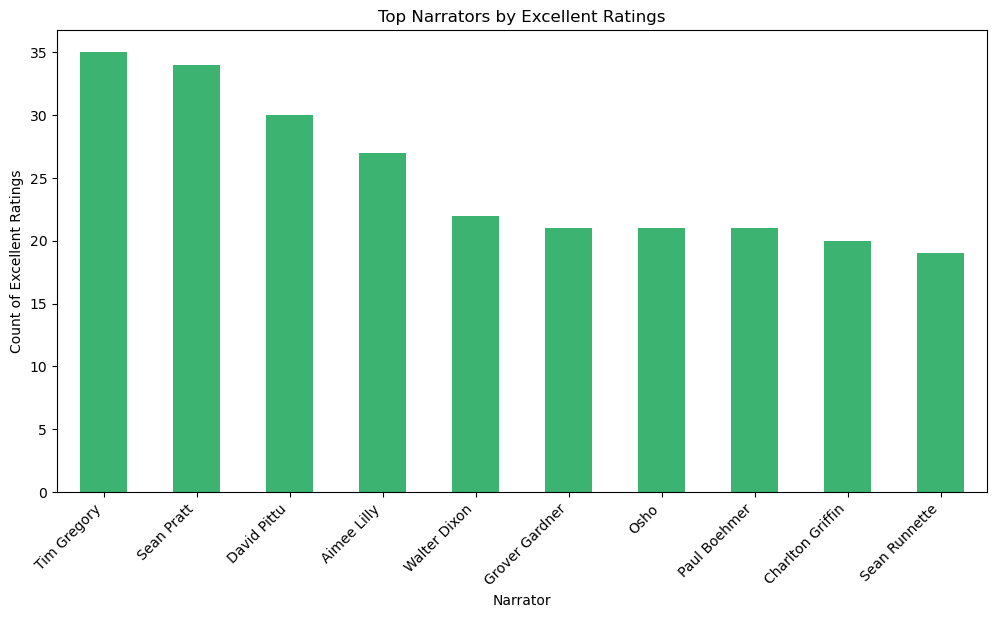

In [54]:
# Filter for Excellent ratings
excellent_narrators = df[df['ratings'] == 'Excellent']

# Count Excellent ratings per narrator
top_narrators = excellent_narrators.groupby('narrator').size().nlargest(10)

# Plot bar chart
top_narrators.plot(kind='bar', figsize=(12,6), color='mediumseagreen')
plt.title("Top Narrators by Excellent Ratings")
plt.xlabel("Narrator")
plt.ylabel("Count of Excellent Ratings")
plt.xticks(rotation=45, ha='right')
plt.show()

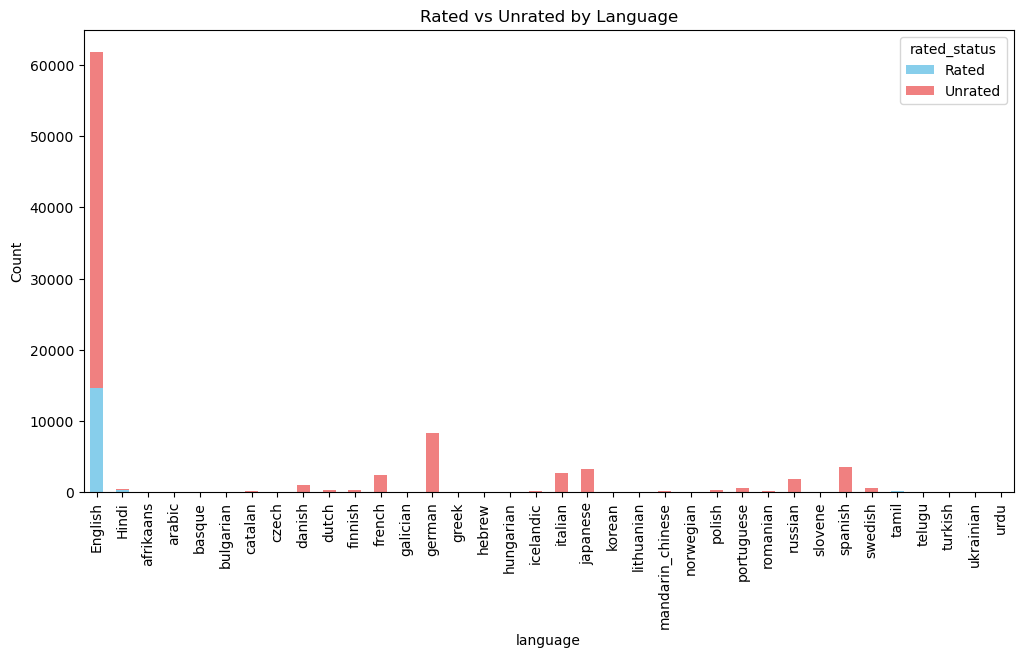

In [49]:
import matplotlib.pyplot as plt

# Rated status column
df['rated_status'] = df['ratings'].apply(lambda x: 'Rated' if x != 'Unrated' else 'Unrated')

# Count by language and rated status
rated_by_lang = df.groupby(['language','rated_status']).size().unstack().fillna(0)

# Plot stacked bar
rated_by_lang.plot(kind='bar', stacked=True, figsize=(12,6),
                   color=['skyblue','lightcoral'],
                   title="Rated vs Unrated by Language")
plt.ylabel("Count")
plt.show()

### Insights from Grouped Analysis

- **Language Trends:** English audiobooks dominate both price and ratings, while most other languages remain largely unrated. Hindi, Tamil, and Urdu show notable engagement, suggesting regional growth potential.
- **Pricing:** Smaller language markets are priced lower, while global languages (English, Mandarin, French) command higher average prices.
- **Narrators:** Certain narrators consistently achieve high ratings, highlighting the importance of narrator performance in user satisfaction.
- **Release Year:** Average prices have shifted over time, reflecting market growth and evolving pricing strategies.

## Insights & Conclusion

Our analysis of the audiobook dataset reveals several key points:

- **Ratings Distribution:** A majority of audiobooks remain *Unrated*, highlighting limited user engagement. Among rated titles, most cluster at the higher end (4–5 stars), suggesting strong satisfaction when reviews are present.
- **Price vs Ratings:** Pricing does not correlate strongly with ratings. Expensive audiobooks do not guarantee higher satisfaction.
- **Length vs Ratings:** Duration has little impact on ratings. Both short and long audiobooks receive similar feedback.
- **Language Trends:** English dominates both price and ratings, while Hindi, Tamil, and Urdu show meaningful engagement, pointing to regional growth opportunities.
- **Narrator Influence:** Certain narrators consistently achieve high ratings, underscoring the importance of performance quality.
- **Release Year:** Average prices have shifted over time, reflecting market growth and evolving pricing strategies.

### Final Takeaway
The audiobook market is highly skewed toward English titles, with pricing and engagement reflecting global demand. Regional languages show emerging potential, while narrator quality and content matter more than price or length in driving satisfaction. For businesses, this suggests focusing on **quality narration, regional expansion, and engagement strategies** rather than pricing alone.

## Final Summary & Recommendations

Through cleaning, exploration, and grouped analysis, we uncovered the following:

- **Engagement Gap:** A majority of audiobooks remain *Unrated*, showing limited user interaction. This highlights the need for stronger review‑collection strategies.
- **Satisfaction Drivers:** When ratings are present, most cluster at 4–5 stars. Price and length do not significantly influence satisfaction — narrator quality and content matter more.
- **Market Trends:** English dominates both pricing and ratings, while Hindi, Tamil, and Urdu show emerging engagement. Smaller language markets are priced lower, reflecting demand.
- **Narrator Impact:** Certain narrators consistently achieve high ratings, proving that performance quality is a critical success factor.
- **Pricing Evolution:** Average prices have shifted over time, reflecting market growth and evolving strategies.

### Recommendations
- **Focus on Narrator Quality:** Invest in strong, engaging narrators to boost satisfaction.
- **Encourage Reviews:** Implement strategies to reduce the large “Unrated” segment, such as prompts or incentives for feedback.
- **Regional Expansion:** Explore growth opportunities in Hindi, Tamil, and Urdu markets where engagement is rising.
- **Pricing Strategy:** Monitor yearly price trends to align with market expectations while maintaining accessibility.

### Closing Note
This analysis demonstrates how structured cleaning, EDA, and grouped insights can transform raw data into actionable business intelligence. The findings emphasize that **quality and engagement outweigh pricing or length in driving audiobook success**.

## Future Work

While this analysis provided strong insights into pricing, ratings, and engagement, several extensions could add further value:

- **Sentiment Analysis:** Apply NLP techniques to audiobook reviews to understand user emotions beyond star ratings.
- **Predictive Modeling:** Build machine learning models to predict ratings based on features like narrator, language, and price.
- **Narrator Clustering:** Use unsupervised learning to group narrators by style or performance quality.
- **Regional Market Analysis:** Deep dive into Hindi, Tamil, and Urdu segments to forecast growth potential.
- **Time-Series Forecasting:** Extend release year analysis to predict future pricing trends.
- **Interactive Dashboards:** Present findings in Power BI or Tableau for dynamic exploration by business stakeholders.

### Closing Thought
This project demonstrates how structured EDA can uncover actionable insights. Expanding into predictive and interactive methods would make the analysis even more powerful for real-world decision-making.